<a href="https://colab.research.google.com/github/ADSRTT/Brain-Tumor/blob/main/Brain_Tumor__ML_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


    Image classification project
    This project classifies various brain tumors under the labels namely
    Meningioma Tumor
    Pituitary Tumor
    Glioma Tumor
    No Tumor 
    
    The project takes an image of the various brain tumors xray  applies Support Vector 
    Algorithm on it and classifies in into any of the 4 labels.
    
    
  

First the code needs the image dataset. The image dataset is the set of raw images labeled under the 4 labels  Meningioma Tumor, Pituitary Tumor, Glioma Tumor and No Tumor. These images are saved in a Repository called Brain-Toomer.

The link for the repository is given below-

https://github.com/ADSRTT/Brain-Tumor.git

To clone this data to Google Colab Environment the command required is "!git clone" followed by the destination or the link of the file.
This is shown below-

**Why Errors and Exceptions are used?** 

To avoid the situation when the cloning is already done and code failing to execute due to the already present folder in Google Colab.

In [ ]:
try:
  !git clone "https://github.com/ADSRTT/Brain-Tumor.git"
except:
  pass

Cloning into 'Brain_Toomer'...
remote: Enumerating objects: 3229, done.
remote: Total 3229 (delta 0), reused 0 (delta 0), pack-reused 3229
Receiving objects: 100% (3229/3229), 73.13 MiB | 25.19 MiB/s, done.
Resolving deltas: 100% (143/143), done.
Updating files: 100% (2970/2970), done.


Now once we have done with cloning the data into the code we will import all the required libraries to make the code.

*  **numpy** -- For handling the large arrays and performing mathematical calulations on these arrays.
*   **pandas** -- For handling the data in pandas dataframe.
*   **os** -- For manupulation of directories.
*   **pickle** -- To save the raw Numpy array in bits to use the dataset later.
*   **matplotlib** -- For plotting the data in terms of Figures and Graphs.
*   **random** -- To perform a random shuffle on the images.
*   **itertools** -- To perform repeated itterations on the data.
*   **threading** -- To perform pipelining of tasks.
*   **time** -- To introduce delays wherever required.
*   **sys** -- It provide various functions used to manipulate different parts of the Python runtime environment.
*   **cv2** -- To load images and manupulation of images.
*   **train_test_split** -- To split the data in test data and train data.
*   **SVC** -- SVC stands for 'Support Vector Classification'. It is the main model in sklean library for Support Vector Machine module.
*   **confusion matrix** --  To display a basic confusion matrix in form of 2D array.
*   **f1_score** -- To display the F1 score for the predicted values.
*   **cv2_imshow** -- To display the image in Google Collab Envireonment.




In [ ]:

#importing all the required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle 
import random
import itertools
import threading
import time
import sys
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from google.colab.patches import cv2_imshow


The below code is just to present the code in a much better way. As the model generation will take time as the image data is large mean while an annimation will run. This code is to generate that annimation.

In [ ]:
done = False
#here is the animation skript 
def animate():
    for c in itertools.cycle(['|', '/', '-', '\\']):
        if done:
          break
        else:
            sys.stdout.write('\r Generating' + ' .... ' + c)
            sys.stdout.flush()
            time.sleep(0.1)

This part of code will read the contents on the repository and make an array of the folder names which will act as the label for our dataset in the code. For reading the directories the os library is used rigorously. 

In [ ]:
main_dataset_directory = "/content/Brain-Toomer/Brain Toomer"
Dataset_labels = []
for lbls in os.listdir(main_dataset_directory):
    Dataset_labels.append(lbls)
print("Labels in the dataset are - \n")
for Dataset_lbls in Dataset_labels:
    print(Dataset_lbls+"\n")

Labels in the dataset are - 

Meningioma Tumor

No Tumor

Glioma Tumor

Pituitary Tumor



In this part of code the images are read. The directories are one by one opened and all the images are read, resized into 300*300 images and converted into 1 dimentional array along with there label as the last element. After the code is done with all the images in a directory it will enter to the next directory and repeat the same process untill all directories and all images are loaded into the array.

The name of the array is output dataset.the first element of this array is an array of the labels for further use. After this later this array contains the images in one dimensional array and last element as the label number. So every element of this array is a single dimensional array of 300*300 + 1 = 900001 values.

In the end the total number of images processed are shown along with the operation complete message. The whole time while all the stuff was happening in the backgroud the annimation we discussed earlier, was running.

In [ ]:
#reading and processing images
t = threading.Thread(target=animate)
t.start()

output_dataset = []
output_dataset.append(Dataset_labels)
#logic to itterate through the images in the directory
for lbl in Dataset_labels:
    current_path = os.path.join(main_dataset_directory,lbl)
    #print(current_path)
    label  = Dataset_labels.index(lbl)
    for image in os.listdir(current_path):
        image_path = os.path.join(current_path,image)
        #print(image_path)
        wildcats_img = cv2.imread(image_path,0)
        try :
            wildcats_img = cv2.resize(wildcats_img,(300,300))
            img_array = np.array(wildcats_img).flatten()
            output_dataset.append([img_array,label])
        except:
            pass
        
done = True 
print("\nTotal images processed -- " + str(len(output_dataset))+"\n")

 Generating .... \
Total images processed -- 2963



The array is output dataset is now saved using pickle library for later use. This is done to avoid the regenerating of the array as the images are already processed why to overload the code to do the already done tasks.

In [ ]:
#saving dataset in pickle
pick_in = open("/content/Brain-Toomer" + "/dataset" + ".pickle",'wb')
pickle.dump(output_dataset,pick_in)
pick_in.close()

Now the saved array is loaded into the code again for further use. The labels and data are separated from the array. The data part of the array is then split into testing set of data and training set of data.

After the splitting of data is done the model is called from the Scikit learn and all the training data is provided to built the learning for the model. This is a tidious task for the machine so the Machine will take arround 15 minutes to generate the model. While the model is generating the same annimation will be running in the command line.

In [ ]:
done = False

dataloc = "/content/Brain-Toomer/dataset.pickle"
print("This is the stage where model will generate \nIt is heavy in size so will take arround 15 mins")
t = threading.Thread(target=animate)
t.start()
dataset = open(dataloc,"rb")
raw_data = pickle.load(dataset)
dataset.close()
categories = raw_data[0]
data = raw_data[1:]
random.shuffle(data)
features = []
labels = []

for feature,label in data:
    features.append(feature)
    labels.append(label)
    
#test train split
training_features, testing_features, training_labels, testing_labels = train_test_split(features,labels,test_size=.11)

#model generation
model = SVC(C=1,kernel = 'poly', gamma = 'auto')
model.fit(training_features,training_labels)
done = True

print("\nModel Successfully generated...........\n")

This is the stage where model will generate 
It is heavy in size so will take arround 15 mins
 Generating .... /
Model Successfully generated...........



Once the model is generated we can now perform various operation using the model which has already learnt from the data. The prediction on the testing data is being made and also the accuracy is calculated. The results for the model accuracy is then presented.

In [ ]:
y_pred = model.predict(testing_features)
accuracy = model.score(testing_features,testing_labels)
print("Accuracy -- " ,accuracy)

Accuracy --  0.8496932515337423


Now a confusion matrix is made between the testing data actual output and the predicted output. This is a basic confusion matrix which is printed in the form of two dimensional array.

In [ ]:
# Making the Confusion Matrix

cm = confusion_matrix(testing_labels, y_pred)
print(cm)

[[90  2 14  4]
 [ 8 32  2  1]
 [12  2 81  2]
 [ 0  0  2 74]]


Now the F1 score is calculated by using the formula for F1 score.

In [ ]:

#for calculating  accuracy_score
print("f1_score =",f1_score(testing_labels,y_pred, average='macro'))

f1_score = 0.8493785429852165


Once everything is set the code is ready to be deployed. This below code is the basic implementation of the deployment. 8 test images are provided with the data set repository. If the user wants to use his own image for pridiction we have to upload the Xray image in the Brain-Toomer folder in the files section and then providing the image name in the deployment script with full extension. The code will load the image make an output prediction and display the result in the command line along with the uploaded images.
This part of script is made user friendly to interract with user efficiently.

this the final deployment script of my project

4 sample images namely

t1.jpg , t2.jpg , t3.jpg , t4.jpg , t5.jpg , t6.jpg , t7.jpg , t8.jpg

provided with the code to check the model on random images

one can add n number of images in '/content/Brain-Toomer' colab directory

Test image name with format-- 
t3.jpg


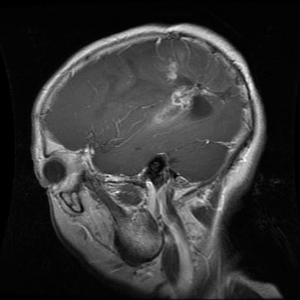

the Tumer Shown in the image is -- Glioma Tumor

yeah!! your previous pridiction was succesfully!!!
type 'y' to make another prediction...
 'n' to abort... 
y
Test image name with format-- 
t7.jpg


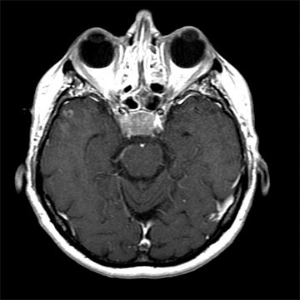

the Tumer Shown in the image is -- Pituitary Tumor

yeah!! your previous pridiction was succesfully!!!
type 'y' to make another prediction...
 'n' to abort... 
n


In [ ]:
print("this the final deployment script of my project\n")
print("4 sample images namely\n")
print("t1.jpg , t2.jpg , t3.jpg , t4.jpg , t5.jpg , t6.jpg , t7.jpg , t8.jpg\n")
print("provided with the code to check the model on random images\n")
print("one can add n number of images in '/content/Brain-Toomer' colab directory\n")

c = 1
while (c == 1):
    img_name = input("Test image name with format-- \n")
    main_dir = "/content/Brain-Toomer"
    image_path = os.path.join(main_dir,img_name)    
    testing_features1 =[]   
    try:
        image = cv2.imread(image_path,0)
        image = cv2.resize(image,(300,300))
        img_array = np.array(image).flatten()
        testing_features1.append(img_array)
        testing_features1.append(img_array)
        y_pred = model.predict(testing_features1)
        label = categories[y_pred[-1]]
        cv2_imshow(testing_features1[-1].reshape(300,300))
        print("the Tumer Shown in the image is -- " + label+"\n")
        cv2.destroyAllWindows()
        time.sleep(1)
        x=input("yeah!! your previous pridiction was succesfully!!!\ntype 'y' to make another prediction...\n 'n' to abort... \n")
        x= x.strip(" ")
        if (x=="Y" or x=="y"):
            c=1
        else:
            c=0
            
    except:
        print("Can't find the file.... please enter correct path....\n")
        abort = input ("type 'x' to abort, or just hit enter to go with the flow...")
        if (abort == "x"):
           c=0
        else:
          pass

The code is running fine and generating fine results. The accuracy is arround 87 percent for an average value. The project is yet to be tested with different Classification techniques like Convolutional Neural Network(CNN). The later part of the development includes the testing and evaluating for different techniques to generate better results.
Moreover one fact is there that these images are collected from different sources on internet. If the model is provided with real time Xray images the ressuls can be fairly improved under the same technique umbrella.